In [1]:
#Задание 1
#Retention – один из самых важных показателей в компании. 
#Ваша задача – написать функцию, которая будет считать retention игроков (по дням от даты регистрации игрока). 
#Функция должна быть написана на python. 
#В ходе решения можно тестировать работу функции как на полном датасете, так и на части (сэмпле) данных.
#Сначала я проверяю оба датафрейма-пустые значения+дубликаты
import numpy as np
import pandas as pd
import seaborn as sns
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

auth_df=pd.read_csv('problem1-auth_data.csv', sep=';')
auth_df

,auth_ts,uid
0,911382223,1
1,932683089,2
2,932921206,2
3,933393015,2
4,933875379,2
...,...,...
9601008,1600874034,1110618
9601009,1600874086,1110619
9601010,1600874139,1110620
9601011,1600874191,1110621


In [2]:
auth_df.dtypes

auth_ts    int64
uid        int64
dtype: object

In [3]:
#Проверка на пустые значения
auth_df.isna().sum()

auth_ts    0
uid        0
dtype: int64

In [4]:
#Проверка на дубликаты (число строк совпало, дубликатов нет)
auth_df=auth_df.drop_duplicates()
auth_df

,auth_ts,uid
0,911382223,1
1,932683089,2
2,932921206,2
3,933393015,2
4,933875379,2
...,...,...
9601008,1600874034,1110618
9601009,1600874086,1110619
9601010,1600874139,1110620
9601011,1600874191,1110621


In [5]:
#Тоже самое с датой регистрации
reg_df=pd.read_csv('problem1-reg_data.csv', sep=';')
reg_df

,reg_ts,uid
0,911382223,1
1,932683089,2
2,947802447,3
3,959523541,4
4,969103313,5
...,...,...
999995,1600874034,1110618
999996,1600874086,1110619
999997,1600874139,1110620
999998,1600874191,1110621


In [6]:
#Проверка на пустые значения
reg_df.isna().sum()

reg_ts    0
uid       0
dtype: int64

In [7]:
#Проверка на дубликаты
reg_df=reg_df.drop_duplicates()
reg_df

,reg_ts,uid
0,911382223,1
1,932683089,2
2,947802447,3
3,959523541,4
4,969103313,5
...,...,...
999995,1600874034,1110618
999996,1600874086,1110619
999997,1600874139,1110620
999998,1600874191,1110621


In [9]:
#ВАЖНО!!! Я специально залез в статью Глоссарий метрик игровой аналитики(игры люблю, уж простите:3).
#Там написано следующее:
#Удержание в день N = Количество пользователей, которые запустили приложение в день N / Количество пользователей, которые установили приложение N дней назад * 100%
#Таким образом на выходе нам нужна не доля, а процент (я думал, что просто числа хватит. Правки в описание функции внёс)

In [10]:
#Отдельно (для функции) сделаю трансформацию 2 столбцов в формат даты и времени 'YYYY-MM-DD'
#Затем проведу необходимые вычисления+создание таблицы на вывод, а потом закину это в функцию
#unit='s' используем, так как у нас даты в формате int64+округление через dt.round('d'). Это я нагуглил

In [11]:
auth_df['auth_ts'] = pd.to_datetime(auth_df['auth_ts'], unit='s').dt.round('d')

In [12]:
result_1=auth_df
result_1

,auth_ts,uid
0,1998-11-18,1
1,1999-07-23,2
2,1999-07-26,2
3,1999-07-31,2
4,1999-08-06,2
...,...,...
9601008,2020-09-24,1110618
9601009,2020-09-24,1110619
9601010,2020-09-24,1110620
9601011,2020-09-24,1110621


In [13]:
result_1['first_date']='2020-08-01'
result_1['last_date']='2020-08-30'
result_1

,auth_ts,uid,first_date,last_date
0,1998-11-18,1,2020-08-01,2020-08-30
1,1999-07-23,2,2020-08-01,2020-08-30
2,1999-07-26,2,2020-08-01,2020-08-30
3,1999-07-31,2,2020-08-01,2020-08-30
4,1999-08-06,2,2020-08-01,2020-08-30
...,...,...,...,...
9601008,2020-09-24,1110618,2020-08-01,2020-08-30
9601009,2020-09-24,1110619,2020-08-01,2020-08-30
9601010,2020-09-24,1110620,2020-08-01,2020-08-30
9601011,2020-09-24,1110621,2020-08-01,2020-08-30


In [14]:
result_1['first_date']=pd.to_datetime(result_1.first_date)
result_1['last_date']=pd.to_datetime(result_1.last_date)
result_1

,auth_ts,uid,first_date,last_date
0,1998-11-18,1,2020-08-01,2020-08-30
1,1999-07-23,2,2020-08-01,2020-08-30
2,1999-07-26,2,2020-08-01,2020-08-30
3,1999-07-31,2,2020-08-01,2020-08-30
4,1999-08-06,2,2020-08-01,2020-08-30
...,...,...,...,...
9601008,2020-09-24,1110618,2020-08-01,2020-08-30
9601009,2020-09-24,1110619,2020-08-01,2020-08-30
9601010,2020-09-24,1110620,2020-08-01,2020-08-30
9601011,2020-09-24,1110621,2020-08-01,2020-08-30


In [15]:
result_1.dtypes

auth_ts       datetime64[ns]
uid                    int64
first_date    datetime64[ns]
last_date     datetime64[ns]
dtype: object

In [16]:
result_1=result_1.query("auth_ts>=first_date and auth_ts<=last_date")
result_1

,auth_ts,uid,first_date,last_date
8780235,2020-08-01,76680,2020-08-01,2020-08-30
8780236,2020-08-01,32688,2020-08-01,2020-08-30
8780237,2020-08-01,282342,2020-08-01,2020-08-30
8780238,2020-08-01,263931,2020-08-01,2020-08-30
8780239,2020-08-01,1016020,2020-08-01,2020-08-30
...,...,...,...,...
9226421,2020-08-30,342879,2020-08-01,2020-08-30
9226422,2020-08-30,810807,2020-08-01,2020-08-30
9226423,2020-08-30,96581,2020-08-01,2020-08-30
9226424,2020-08-30,601639,2020-08-01,2020-08-30


In [17]:
fnl_prep1=result_1.drop(['first_date', 'last_date'], axis=1)
fnl_prep1

,auth_ts,uid
8780235,2020-08-01,76680
8780236,2020-08-01,32688
8780237,2020-08-01,282342
8780238,2020-08-01,263931
8780239,2020-08-01,1016020
...,...,...
9226421,2020-08-30,342879
9226422,2020-08-30,810807
9226423,2020-08-30,96581
9226424,2020-08-30,601639


In [18]:
reg_df['reg_ts'] = pd.to_datetime(reg_df['reg_ts'], unit='s').dt.round('d')

In [19]:
result_2=reg_df
result_2

,reg_ts,uid
0,1998-11-18,1
1,1999-07-23,2
2,2000-01-14,3
3,2000-05-29,4
4,2000-09-16,5
...,...,...
999995,2020-09-24,1110618
999996,2020-09-24,1110619
999997,2020-09-24,1110620
999998,2020-09-24,1110621


In [20]:
result_2['first_date']='2020-08-01'
result_2['last_date']='2020-08-30'
result_2['first_date']=pd.to_datetime(result_2.first_date)
result_2['last_date']=pd.to_datetime(result_2.last_date)
result_2=result_2.query("reg_ts>=first_date and reg_ts<=last_date")
fnl_prep2=result_2.drop(['first_date', 'last_date'], axis=1)
fnl_prep2

,reg_ts,uid
914826,2020-08-01,1016020
914827,2020-08-01,1016021
914828,2020-08-01,1016022
914829,2020-08-01,1016023
914830,2020-08-01,1016024
...,...,...
961082,2020-08-30,1067366
961083,2020-08-30,1067367
961084,2020-08-30,1067368
961085,2020-08-30,1067369


In [21]:
final_res=fnl_prep1.merge(fnl_prep2, on='uid')
final_res['date_diff']=final_res['auth_ts']-final_res['reg_ts']
final_res

,auth_ts,uid,reg_ts,date_diff
0,2020-08-01,1016020,2020-08-01,0 days
1,2020-08-01,1016021,2020-08-01,0 days
2,2020-08-01,1016022,2020-08-01,0 days
3,2020-08-04,1016022,2020-08-01,3 days
4,2020-08-06,1016022,2020-08-01,5 days
...,...,...,...,...
77498,2020-08-30,1067366,2020-08-30,0 days
77499,2020-08-30,1067367,2020-08-30,0 days
77500,2020-08-30,1067368,2020-08-30,0 days
77501,2020-08-30,1067369,2020-08-30,0 days


In [22]:
#для того, чтобы лучше отобразить изменение retention, было решено сделать пивот таблицу
#пустые значения заменил на 0, так удобнее и лучше смотрится
result_table = final_res.groupby(['reg_ts', 'date_diff'], as_index=False)\
.agg({'uid':pd.Series.nunique})\
.pivot(index='reg_ts', columns='date_diff', values='uid')
result_table=result_table.fillna(0)
result_table

date_diff,0 days,1 days,2 days,3 days,4 days,5 days,6 days,7 days,8 days,9 days,...,20 days,21 days,22 days,23 days,24 days,25 days,26 days,27 days,28 days,29 days
reg_ts,,,,,,,,,,,,,,,,,,,,,
2020-08-01,1506.0,31.0,67.0,73.0,70.0,102.0,103.0,89.0,83.0,81.0,...,61.0,53.0,59.0,44.0,59.0,47.0,43.0,44.0,53.0,36.0
2020-08-02,1508.0,30.0,70.0,54.0,67.0,100.0,87.0,92.0,76.0,74.0,...,70.0,47.0,59.0,53.0,65.0,52.0,47.0,41.0,52.0,0.0
2020-08-03,1510.0,34.0,63.0,73.0,79.0,123.0,113.0,94.0,64.0,99.0,...,56.0,71.0,60.0,57.0,66.0,59.0,47.0,60.0,0.0,0.0
2020-08-04,1513.0,38.0,58.0,58.0,68.0,95.0,107.0,73.0,60.0,81.0,...,68.0,63.0,52.0,52.0,57.0,60.0,61.0,0.0,0.0,0.0
2020-08-05,1515.0,28.0,66.0,67.0,77.0,76.0,101.0,77.0,67.0,71.0,...,51.0,49.0,60.0,41.0,41.0,51.0,0.0,0.0,0.0,0.0
2020-08-06,1518.0,28.0,62.0,65.0,83.0,90.0,120.0,89.0,71.0,64.0,...,50.0,58.0,48.0,54.0,58.0,0.0,0.0,0.0,0.0,0.0
2020-08-07,1521.0,46.0,60.0,82.0,79.0,102.0,121.0,95.0,81.0,65.0,...,64.0,63.0,74.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-08-08,1523.0,30.0,79.0,64.0,82.0,88.0,111.0,100.0,83.0,66.0,...,63.0,66.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-08-09,1525.0,31.0,64.0,69.0,67.0,90.0,100.0,91.0,62.0,63.0,...,60.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
result_table.dtypes

date_diff
0 days     float64
1 days     float64
2 days     float64
3 days     float64
4 days     float64
5 days     float64
6 days     float64
7 days     float64
8 days     float64
9 days     float64
10 days    float64
11 days    float64
12 days    float64
13 days    float64
14 days    float64
15 days    float64
16 days    float64
17 days    float64
18 days    float64
19 days    float64
20 days    float64
21 days    float64
22 days    float64
23 days    float64
24 days    float64
25 days    float64
26 days    float64
27 days    float64
28 days    float64
29 days    float64
dtype: object

In [36]:
#затем появилась проблема-я хотел переименовать один столбец (0 days), чтобы затем считать retention
#Но с пивот таблицей такой трюк не работает
#Погуглив, я понял, что необходимо конвертировать пивот в датафрейм
finish=pd.DataFrame(result_table)
finish

date_diff,0 days,1 days,2 days,3 days,4 days,5 days,6 days,7 days,8 days,9 days,...,20 days,21 days,22 days,23 days,24 days,25 days,26 days,27 days,28 days,29 days
reg_ts,,,,,,,,,,,,,,,,,,,,,
2020-08-01,1506.0,31.0,67.0,73.0,70.0,102.0,103.0,89.0,83.0,81.0,...,61.0,53.0,59.0,44.0,59.0,47.0,43.0,44.0,53.0,36.0
2020-08-02,1508.0,30.0,70.0,54.0,67.0,100.0,87.0,92.0,76.0,74.0,...,70.0,47.0,59.0,53.0,65.0,52.0,47.0,41.0,52.0,0.0
2020-08-03,1510.0,34.0,63.0,73.0,79.0,123.0,113.0,94.0,64.0,99.0,...,56.0,71.0,60.0,57.0,66.0,59.0,47.0,60.0,0.0,0.0
2020-08-04,1513.0,38.0,58.0,58.0,68.0,95.0,107.0,73.0,60.0,81.0,...,68.0,63.0,52.0,52.0,57.0,60.0,61.0,0.0,0.0,0.0
2020-08-05,1515.0,28.0,66.0,67.0,77.0,76.0,101.0,77.0,67.0,71.0,...,51.0,49.0,60.0,41.0,41.0,51.0,0.0,0.0,0.0,0.0
2020-08-06,1518.0,28.0,62.0,65.0,83.0,90.0,120.0,89.0,71.0,64.0,...,50.0,58.0,48.0,54.0,58.0,0.0,0.0,0.0,0.0,0.0
2020-08-07,1521.0,46.0,60.0,82.0,79.0,102.0,121.0,95.0,81.0,65.0,...,64.0,63.0,74.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-08-08,1523.0,30.0,79.0,64.0,82.0,88.0,111.0,100.0,83.0,66.0,...,63.0,66.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-08-09,1525.0,31.0,64.0,69.0,67.0,90.0,100.0,91.0,62.0,63.0,...,60.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
finish.columns

TimedeltaIndex([ '0 days',  '1 days',  '2 days',  '3 days',  '4 days',
                 '5 days',  '6 days',  '7 days',  '8 days',  '9 days',
                '10 days', '11 days', '12 days', '13 days', '14 days',
                '15 days', '16 days', '17 days', '18 days', '19 days',
                '20 days', '21 days', '22 days', '23 days', '24 days',
                '25 days', '26 days', '27 days', '28 days', '29 days'],
               dtype='timedelta64[ns]', name='date_diff', freq=None)

In [37]:
#Далее-рассчёт метрики retention (retention rate)
#Тут признаюсь честно, хотел это сделать топорным способом, мол finish/finish['0 days']
#Однако результат оказался неверным. Я начал гуглить и наткнулся на функцию div
#применив её получил то, что требуется
#Далее все эти манипуляции я переношу в функцию
finish=(finish.div(finish['0 days'], axis=0).round(3))*100
finish

date_diff,0 days,1 days,2 days,3 days,4 days,5 days,6 days,7 days,8 days,9 days,...,20 days,21 days,22 days,23 days,24 days,25 days,26 days,27 days,28 days,29 days
reg_ts,,,,,,,,,,,,,,,,,,,,,
2020-08-01,100.0,2.1,4.4,4.8,4.6,6.8,6.8,5.9,5.5,5.4,...,4.1,3.5,3.9,2.9,3.9,3.1,2.9,2.9,3.5,2.4
2020-08-02,100.0,2.0,4.6,3.6,4.4,6.6,5.8,6.1,5.0,4.9,...,4.6,3.1,3.9,3.5,4.3,3.4,3.1,2.7,3.4,0.0
2020-08-03,100.0,2.3,4.2,4.8,5.2,8.1,7.5,6.2,4.2,6.6,...,3.7,4.7,4.0,3.8,4.4,3.9,3.1,4.0,0.0,0.0
2020-08-04,100.0,2.5,3.8,3.8,4.5,6.3,7.1,4.8,4.0,5.4,...,4.5,4.2,3.4,3.4,3.8,4.0,4.0,0.0,0.0,0.0
2020-08-05,100.0,1.8,4.4,4.4,5.1,5.0,6.7,5.1,4.4,4.7,...,3.4,3.2,4.0,2.7,2.7,3.4,0.0,0.0,0.0,0.0
2020-08-06,100.0,1.8,4.1,4.3,5.5,5.9,7.9,5.9,4.7,4.2,...,3.3,3.8,3.2,3.6,3.8,0.0,0.0,0.0,0.0,0.0
2020-08-07,100.0,3.0,3.9,5.4,5.2,6.7,8.0,6.2,5.3,4.3,...,4.2,4.1,4.9,2.8,0.0,0.0,0.0,0.0,0.0,0.0
2020-08-08,100.0,2.0,5.2,4.2,5.4,5.8,7.3,6.6,5.4,4.3,...,4.1,4.3,3.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-08-09,100.0,2.0,4.2,4.5,4.4,5.9,6.6,6.0,4.1,4.1,...,3.9,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
#Сама функция
def retention_calculation(auth_df, reg_df):
    """Функция retention_calculation принимает два аргумента-датафреймы, необходимые для подсчёта retention. 
    Возвращает pivot датафрейм с подсчитанным retention rate"""
    auth_df['auth_ts'] = pd.to_datetime(auth_df['auth_ts'], unit='s').dt.round('d')
    reg_df['reg_ts'] = pd.to_datetime(reg_df['reg_ts'], unit='s').dt.round('d')
    result_1=auth_df
    result_1['first_date']='2020-08-01'
    result_1['last_date']='2020-08-30'
    result_1['first_date']=pd.to_datetime(result_1.first_date)
    result_1['last_date']=pd.to_datetime(result_1.last_date)
    result_1=result_1.query("auth_ts>=first_date and auth_ts<=last_date")
    fnl_prep1=result_1.drop(['first_date', 'last_date'], axis=1)
    result_2=reg_df
    result_2['first_date']='2020-08-01'
    result_2['last_date']='2020-08-30'
    result_2['first_date']=pd.to_datetime(result_2.first_date)
    result_2['last_date']=pd.to_datetime(result_2.last_date)
    result_2=result_2.query("reg_ts>=first_date and reg_ts<=last_date")
    fnl_prep2=result_2.drop(['first_date', 'last_date'], axis=1)
    final_res=fnl_prep1.merge(fnl_prep2, on='uid')
    final_res['date_diff']=final_res['auth_ts']-final_res['reg_ts']
    result_table = final_res.groupby(['reg_ts', 'date_diff'], as_index=False)\
    .agg({'uid':pd.Series.nunique})\
    .pivot(index='reg_ts', columns='date_diff', values='uid')
    result_table=result_table.fillna(0)
    result_table
    finish=pd.DataFrame(result_table)
    finish=(finish.div(finish['0 days'], axis=0).round(3))*100
    return finish

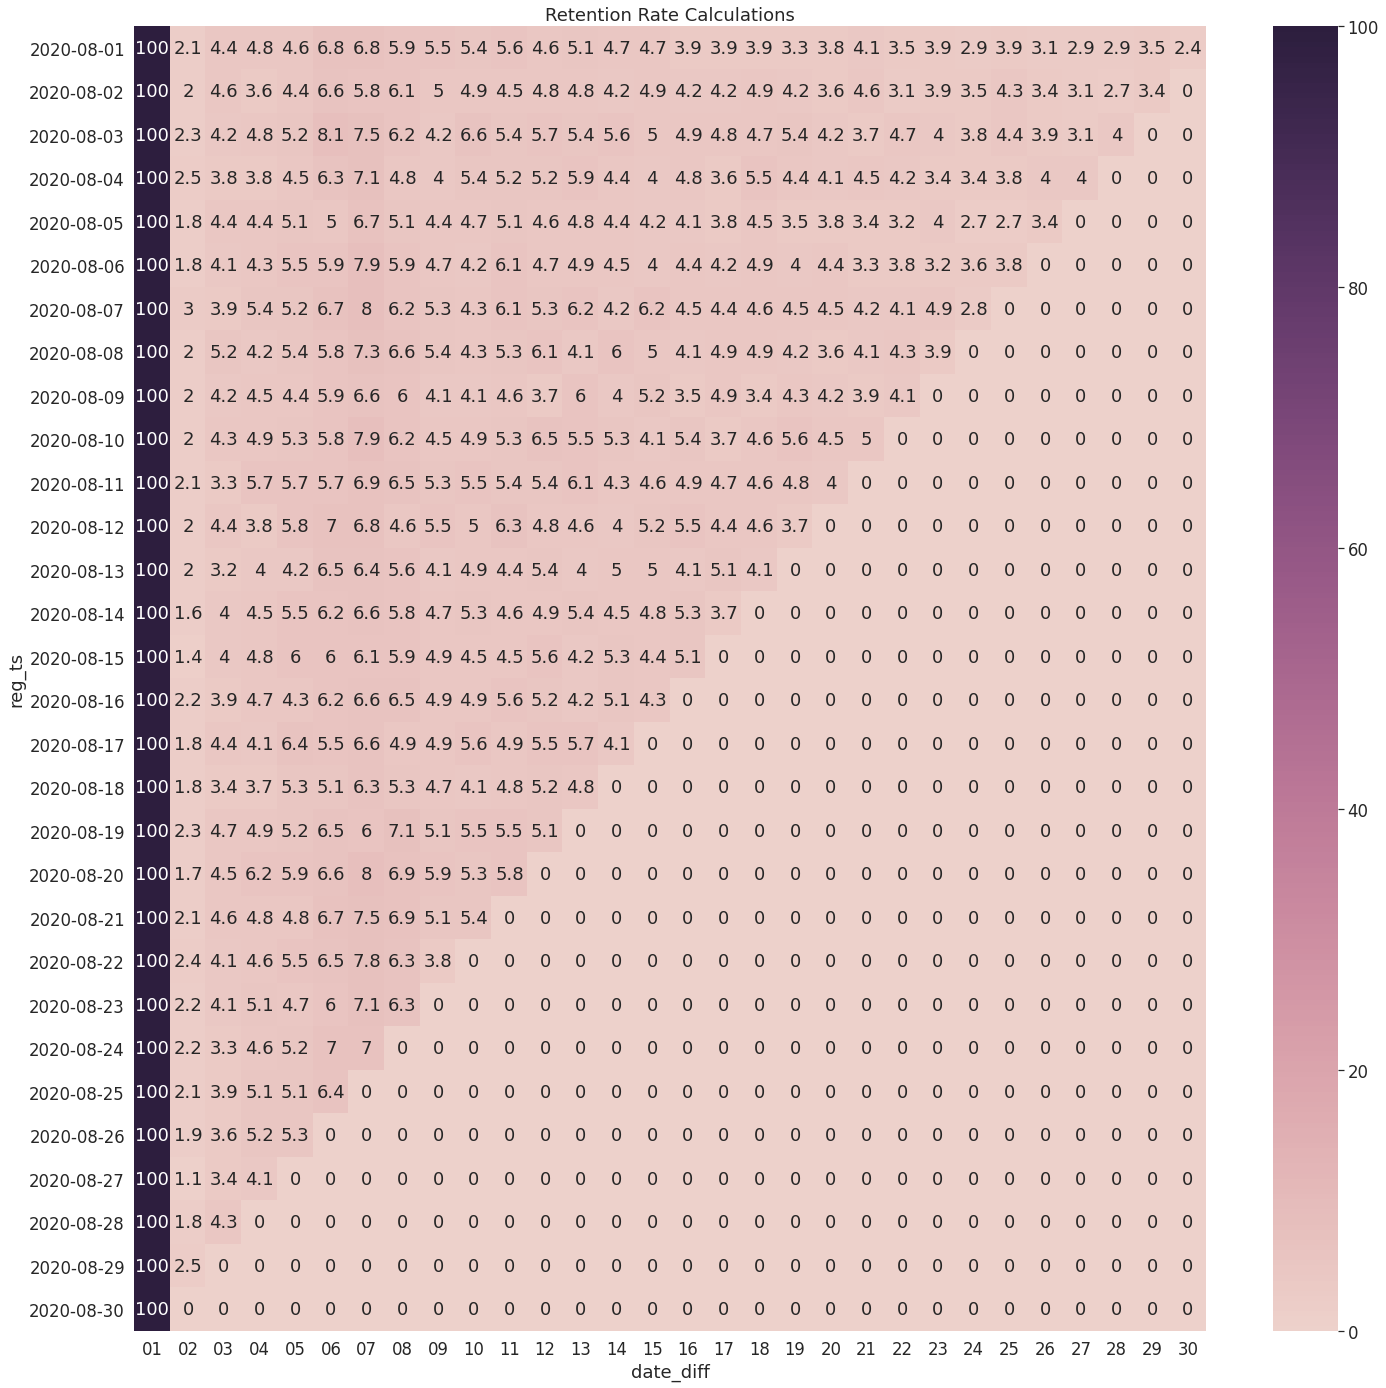

In [97]:
#Проверка работы функции
#Сделал ещё визуализацию
#Про визуализацию: тут ещё понадобилось убрать лишние цифры с осей. 
#Вспомнил наши уроки по питону+гугл и в результате, получил необходимый мне график
#единственное, пришлось коряво сделать со значениями оси Х. По сути, скопировать+вставить, однако
#Необходимо было развернуть дни. Здесь я нагугли информацию про plt.xticks(rotation)
#Со значениями оси Х вышло не очень 
#(там остался 0 в начале, с помощью str я убирал лишнее, однако в случае оси Х, 0 нам нужен, так как далее идут двузначные числа....)
#Каюсь, оформление хит мапа я украл из документации cmap=sns.cubehelix_palette(as_cmap=True), 
#вот ссылка: https://seaborn.pydata.org/generated/seaborn.heatmap.html
import matplotlib.pyplot as plt
show_me_result=retention_calculation(auth_df, reg_df)
plt.figure(figsize = (24,24))
heatmap=sns.heatmap(data=show_me_result, annot=True, fmt='.3g', cmap=sns.cubehelix_palette(as_cmap=True))
heatmap.set_yticklabels(show_me_result.reset_index().reg_ts.astype(str).str[:10]) 
heatmap.set_xticklabels(show_me_result.reset_index().reg_ts.astype(str).str[8:10]) 
heatmap.set(title="Retention Rate Calculations") 
plt.xticks(rotation=0)
plt.show()

In [50]:
#Задание 2
#Имеются результаты A/B теста, в котором двум группам пользователей предлагались различные наборы акционных предложений. 
#Известно, что ARPU в тестовой группе выше на 5%, чем в контрольной. 
#При этом в контрольной группе 1928 игроков из 202103 оказались платящими, а в тестовой – 1805 из 202667.
#Для начала индентифицирую какая группа тестовая, а какая контрольная
import numpy as np
import pandas as pd
import seaborn as sns
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
task_2=pd.read_csv('Проект_1_Задание_2.csv', sep=';')
task_2

,user_id,revenue,testgroup
0,1,0,b
1,2,0,a
2,3,0,a
3,4,0,b
4,5,0,b
...,...,...,...
404765,404766,0,a
404766,404767,0,b
404767,404768,231,a
404768,404769,0,a


In [51]:
#Итог: группа а-контроль, а группа б-тест.Далее распределяем
task_2.query("testgroup=='a'")

,user_id,revenue,testgroup
1,2,0,a
2,3,0,a
9,10,0,a
10,11,0,a
11,12,0,a
...,...,...,...
404760,404761,0,a
404762,404763,0,a
404765,404766,0,a
404767,404768,231,a


In [52]:
control_df=task_2.query("testgroup=='a'")
control_df

,user_id,revenue,testgroup
1,2,0,a
2,3,0,a
9,10,0,a
10,11,0,a
11,12,0,a
...,...,...,...
404760,404761,0,a
404762,404763,0,a
404765,404766,0,a
404767,404768,231,a


In [53]:
test_df=task_2.query("testgroup=='b'")
test_df

,user_id,revenue,testgroup
0,1,0,b
3,4,0,b
4,5,0,b
5,6,0,b
6,7,0,b
...,...,...,...
404761,404762,0,b
404763,404764,0,b
404764,404765,0,b
404766,404767,0,b


In [54]:
#Посмотрим на платящих пользователей
test_df_payusers=test_df.query("revenue>0")
test_df_payusers

,user_id,revenue,testgroup
160,161,3797,b
377,378,3768,b
386,387,3527,b
551,552,2038,b
913,914,3902,b
...,...,...,...
403843,403844,3383,b
403994,403995,2793,b
404161,404162,2316,b
404193,404194,2998,b


In [55]:
control_df_payusers=control_df.query("revenue>0")
control_df_payusers

,user_id,revenue,testgroup
72,73,351,a
341,342,290,a
385,386,250,a
416,417,37324,a
712,713,255,a
...,...,...,...
404304,404305,360,a
404315,404316,262,a
404543,404544,369,a
404602,404603,251,a


In [56]:
#Проверка ARPU
task_2.groupby(['testgroup'], as_index=False)\
.agg({'revenue':'mean'})

,testgroup,revenue
0,a,25.413720
1,b,26.751287


In [57]:
#Да, всё верно
x=((26.751287/25.413720)*100)-100
x=round(x,2)
x

5.26

In [72]:
#ARPPU
#В тестовой группе ARPPU также выше
task_2.query("revenue>0").groupby(['testgroup'], as_index=False)\
.agg({'revenue':'mean'})

,testgroup,revenue
0,a,2663.998444
1,b,3003.658172


In [73]:
x=((3003.658172/2663.998444)*100)-100
x=round(x,2)
x

12.75

In [9]:
test_df.describe()

,user_id,revenue
count,202667.000000,202667.000000
mean,202215.564389,26.751287
std,116891.926690,287.324162
min,1.000000,0.000000
25%,100855.500000,0.000000
50%,201821.000000,0.000000
75%,303602.500000,0.000000
max,404770.000000,4000.000000


In [10]:
control_df.describe()

,user_id,revenue
count,202103.000000,202103.000000
mean,202555.909843,25.413720
std,116802.329266,920.768137
min,2.000000,0.000000
25%,101502.500000,0.000000
50%,202988.000000,0.000000
75%,303559.000000,0.000000
max,404769.000000,37433.000000


In [11]:
test_df_payusers.describe()

,user_id,revenue
count,1805.000000,1805.000000
mean,205834.548476,3003.658172
std,116400.045485,572.619709
min,161.000000,2000.000000
25%,106815.000000,2513.000000
50%,206651.000000,3022.000000
75%,304907.000000,3478.000000
max,404526.000000,4000.000000


In [12]:
control_df_payusers.describe()

,user_id,revenue
count,1928.000000,1928.000000
mean,200152.677905,2663.998444
std,116596.504905,9049.039763
min,73.000000,200.000000
25%,99323.000000,257.000000
50%,199854.500000,311.000000
75%,299664.250000,361.000000
max,404768.000000,37433.000000


In [46]:
control_df_payusers.revenue.median()

311.0

In [58]:
test_df_payusers.revenue.median()

3022.0

In [16]:
test_df.revenue.median()

0.0

In [17]:
#Заметил очень интересную особенность
#Первое-средние изменились, когда мы отсеяли тех, кто не платит (revenue=0)
#Второе-это процентили 75. в тестовой группе-3478, а контрольной 361. При этом в контрольной максимальное значение аж 37433
#решил посмотреть на квантили
control_df_payusers.revenue.quantile([0.25, 0.5, 0.75, 0.90, 0.95])

0.25      257.00
0.50      311.00
0.75      361.00
0.90      393.30
0.95    37299.65
Name: revenue, dtype: float64

In [18]:
test_df_payusers.revenue.quantile([0.25, 0.5, 0.75, 0.90, 0.95])

0.25    2513.0
0.50    3022.0
0.75    3478.0
0.90    3795.8
0.95    3891.8
Name: revenue, dtype: float64

In [20]:
control_df_payusers.query("revenue>35000").sort_values(by='revenue', ascending=True)

,user_id,revenue,testgroup
19495,19496,37293,a
81477,81478,37294,a
235858,235859,37294,a
254113,254114,37294,a
34534,34535,37294,a
...,...,...,...
142804,142805,37379,a
21585,21586,37385,a
65077,65078,37394,a
196601,196602,37407,a


In [22]:
control_df_payusers.query("revenue>35000").revenue.sum()

4590252

In [23]:
4590252/control_df.revenue.sum()

0.8937077665950377

In [ ]:
#Получается, что в контрольной группе 123 человека дают около 90% всей прибыли. 
#Все выводы напишу после исследования

In [9]:
#Теперь, подготовлю данные и визуализирую их так, чтобы посмотреть как распределены наши данные
#Для этого решил построить графикик через sns.histplot

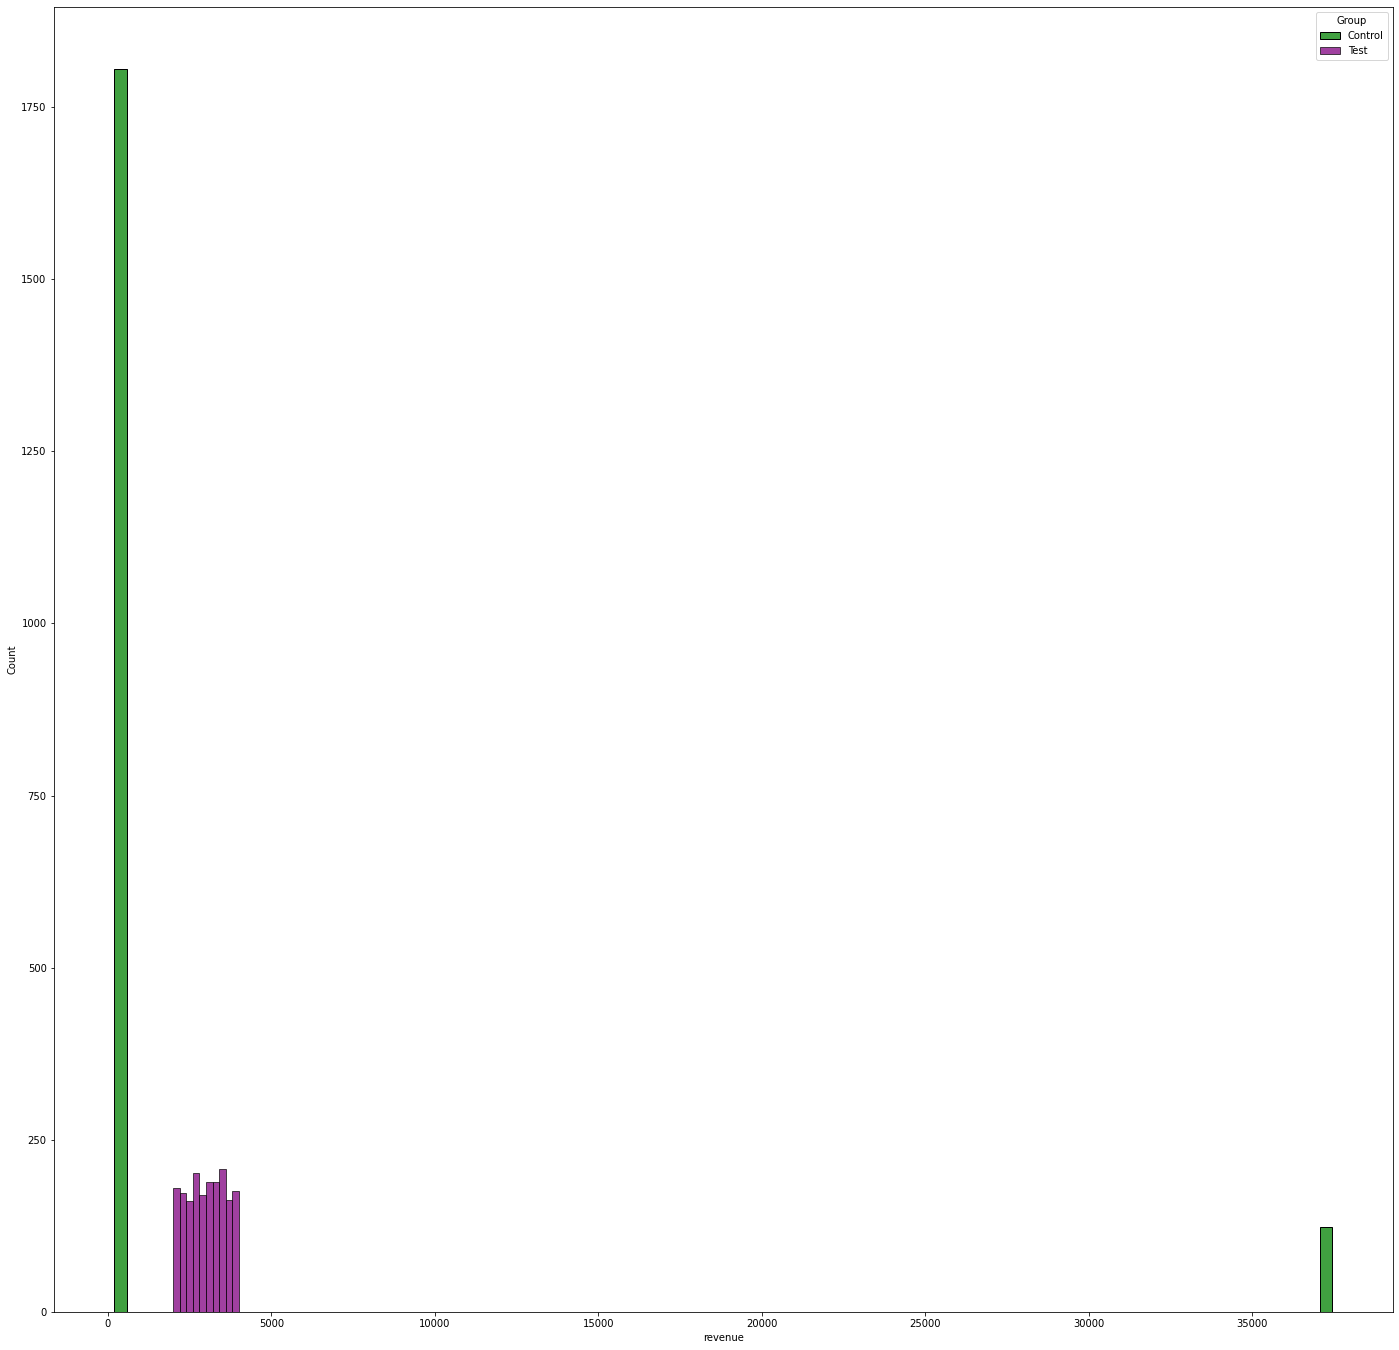

In [12]:
#Из графика видно, что в контрольно группе много человек платят маленькие суммы, а также есть немного людей, которые платят более 35000 
#В тестовой же группе все люди платят суммы в интервале 0-5000.
#И тут я вспомнил, что у нас вариант про геймдев.
#Получается, что в контрольной группе у нас мальки и киты, а в тестовой дельфины
plt.figure(figsize = (24,24))
sns.histplot(data=control_df_payusers, x='revenue', color='green', bins=100)
sns.histplot(data=test_df_payusers, x='revenue', color='purple', bins=10)
plt.legend(title='Group', loc='upper right', labels=['Control', 'Test'])

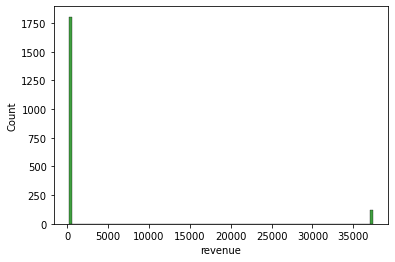

In [33]:
#Теперь посмотрю на распределения отдельно
sns.histplot(data=control_df_payusers, x='revenue', color='green', bins=100)

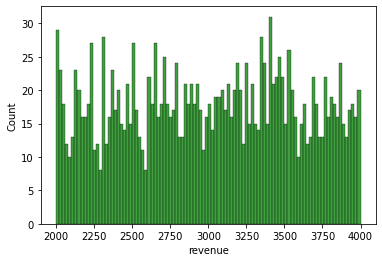

In [32]:
sns.histplot(data=test_df_payusers, x='revenue', color='green', bins=100)

In [15]:
#Далее решил проверить на нормальность через normaltest
import scipy
import pingouin as pg
import statsmodels.api as sm
import statsmodels.formula.api as smf

/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [16]:
#Напоминаю-p должно быть больше 0.05
#Тест показывает, что p<0.05-ненормальное
scipy.stats.normaltest(control_df_payusers.revenue)

NormaltestResult(statistic=1394.9457843086925, pvalue=1.2341605505935488e-303)

In [17]:
#Тоже самое
scipy.stats.normaltest(test_df_payusers.revenue)

NormaltestResult(statistic=1068.8600084412267, pvalue=7.943249488371762e-233)

In [ ]:
#Оба распределения не нормальные. T-тест здесь не подойдёт
#Решил идти более простым способом-бутстрапом.
#Почему именно он? В нашем случае оба распределения не нормальные. Мы можем использовать тест Манна-Уитни (в предыдущей версии я это сделал)
#Однако Манна-Уитни не показал чего-то особенного. Это была моя ошибка. Более того, я хотел сравнить медианы (как в 8 лекции)
#А под это дело, Манна-Уитни не подходит от слова совсем.
#+Бутстрап является универсальным средством.
#Поскольку меня попросили переделать, я также залез в материалы по бутстрапу и обнаружил, как по мне, более классную функцию
#Функция взята из старого видео от Анатолия Карпова про бутстрап

In [48]:
#Я немного изменил функцию, а именно boot_id сделал не 1000, а 2000, как это было в предыдущей версии моей работы
#Данную функцию мы сначала используем для ARPPU
#Также я решил оставить показатель среднее значение, а не заменять его на медиану (хотя мождно было и заменить)
#По началу функция не работала. Были ошибки с tqdm и norm
#Поэтому пришлось добавить соответсвующие import, чтобы избежать этих ошибок
def get_bootstrap(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 2000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    from tqdm import tqdm
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, # чтобы сохранить дисперсию, берем такой же размер выборки
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) 
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
    
    from numpy import linalg as LA
    import scipy.stats as ss
    p_1 = ss.norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = ss.norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    _, _, bars = plt.hist(pd_boot_data[0], bins = 50)
    for bar in bars:
        if abs(bar.get_x()) <= quants.iloc[0][0] or abs(bar.get_x()) >= quants.iloc[1][0]:
            bar.set_facecolor('red')
        else: 
            bar.set_facecolor('grey')
            bar.set_edgecolor('black')
    
    plt.style.use('ggplot')
    plt.vlines(quants,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "quants": quants, 
            "p_value": p_value}

100%|██████████| 2000/2000 [00:00<00:00, 3020.31it/s]


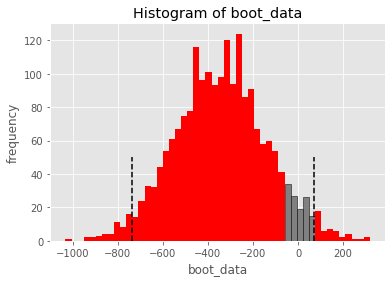

In [49]:
#Мы видим, что 0 попадает в наш доверительный интервал.
#Это означает, что статистической разницы в ARPPU между группами нет
booted_data = get_bootstrap(control_df_payusers.revenue, test_df_payusers.revenue)

In [50]:
booted_data['p_value']

0.09215396788638267

In [51]:
#Это наш доверительный интервал
booted_data['quants']

,0
0.025,-734.938265
0.975,69.063006


100%|██████████| 2000/2000 [00:52<00:00, 38.26it/s]


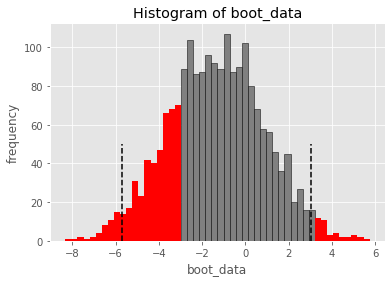

In [52]:
#Далее проверяем ARPU
#Здесь мы тоже видим, что 0 попадает в доверительный интервал.
#Получается, что стат. значимой разницы между группами нет и у показателя ARPU
#А это означает, что нулевая гипотеза (об отсутствии разницы) подтверждается
booted_data = get_bootstrap(control_df.revenue, test_df.revenue)

In [53]:
booted_data['p_value']

0.5427468150727859

In [54]:
booted_data['quants']

,0
0.025,-5.695996
0.975,3.037466


In [ ]:
#Моя работа в который раз отправляется на доработку из-за второго задания.
#Благодаря комментариям и просто моим размышлениям, я решил посмотреть конверсию в платящего пользователя

In [23]:
#Конвертацию удобно сделать, применив np.where (этот метод я использовал в одном из тестовых заданий)
#Делать буду на общем df
task_2['Conversion_Pay']=np.where(task_2['revenue'] > 0, 1, 0)
task_2

,user_id,revenue,testgroup,Conversion_Pay
0,1,0,b,0
1,2,0,a,0
2,3,0,a,0
3,4,0,b,0
4,5,0,b,0
...,...,...,...,...
404765,404766,0,a,0
404766,404767,0,b,0
404767,404768,231,a,1
404768,404769,0,a,0


In [28]:
#Далее я нагуглил в интернете способ, который сделает нашу таблицу более удобной-crosstab
conversion_df=pd.crosstab(task_2.testgroup, task_2.Conversion_Pay)
conversion_df=conversion_df.reset_index()
conversion_df

Conversion_Pay,testgroup,0,1
0,a,200175,1928
1,b,200862,1805


In [35]:
#Отдельно посмотрю конверсии
#Контрольная
1928/200175*100

0.9631572374172599

In [36]:
#тестовая
#В контрольной конвертация лучше. Интересно
1805/200862*100

0.898626917983491

In [39]:
#Далее я решил проверить есть ли у нас стат значимые различия (гипотезы H0 и H1)
#Хорошенько подумав, я выбрал метод Хи-квадрат
#Почему-то не работал с переменной, пришлось засунуть туда не conversion_df, а непосредственно crosstab
#Второе наше значение это p-value
import scipy
from scipy import stats
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
stats.chi2_contingency(pd.crosstab(task_2.testgroup, task_2.Conversion_Pay))

(4.374729521260405,
 0.03647561892312613,
 1,
 array([[200239.10075104,   1863.89924896],
        [200797.89924896,   1869.10075104]]))

In [40]:
#Наш p-value меньше 0.05. Это значит, что мы отклоняем нулевую гипотезу об отсутсвии стат.значимой разницы между тестовой и контрольной группой
#В контрольной группе, конвертация выше, чем в тестовой (напоминание)
p=0.03647561892312613
p<0.05

True

In [45]:
#Ответ на 2 задание:
#Исходя из полученных результатов, я делаю следующие выводы.
#Первое-несмотря на то, что ARPU и ARPPU (проверка в начале, по итогу-APRU в тестовой на 5%, а ARPPU на 12%) выше у тестовой группы, с точки зрения стат. исследования, эти результаты не стат.значимы
#Второе-конверсия. Результаты исследования подтверждают, что конверсии в группах стат.значимо различаются (В контрольной группе, конвертация выше, чем в тестовой)
#Третье-нельзя сделать какие-либо выводы по наборам тестов и метрикам. Почему?
#Потому что, скорее всего, система сплитования сработала неверно. В контрольной группе у нас киты и мальки, а в тестовой одни дельфины.
#Почему так получилось, неизвестно. Поэтому a/b-тест можно считать некорректно проведённым.

In [ ]:
#3 задание
#В игре Plants & Gardens каждый месяц проводятся тематические события, ограниченные по времени. 
#В них игроки могут получить уникальные предметы для сада и персонажей, дополнительные монеты или бонусы. 
#Для получения награды требуется пройти ряд уровней за определенное время. 
#С помощью каких метрик можно оценить результаты последнего прошедшего события?
#Предположим, в другом событии мы усложнили механику событий так, что при каждой неудачной попытке выполнения уровня игрок будет откатываться на несколько уровней назад. 
#Изменится ли набор метрик оценки результата? Если да, то как?

In [ ]:
#ЕЕЕЕ ТВОРЧЕСКИЕ ЗАДАНИЯ :D
#А если серьёзно, то оценивать стоит по количествам пройденных уровней, время прохождении уровней. (Делаю задание с учётом доп условий)
#Более того, мы сможешь посмотреть на отвал игроков на конкретных уровнях. Это даст нам понять какие из них слишком сложные, а какие наоборот, слишком лёгкие
#Что касается продуктовых метрик:
#Моё мнение следующее: прежде всего, активность игроков (онлайн)-DAU,WAU или MAU. Также время сессий
#Далее retention-собственно, через него и будем смотреть отвал
#Конечно же экономические метрики ARPU, ARPPU. Нам важно понять охотно ли игроки покупают что-то во время данных событий (это, кстати, поможет в будущем при правке баланса уровней)
#Случайно про это вспомнил и понеслась...
#Мы же наверняка будем раскручивать рекламу для привлечения максимально возможного количества игроков для участия в ивенте
#Соответсвенно, мы можем посмотреть рекламные метрики (клики, установки и стоимость привлечения)
#Для доп условия-всё выше перечисленное, по сути, подходит. Тот же retention покажет %отвала игроков с уровней и с ивента
#P.S. Но, чтобы не усложнять себе жизнь, тот же отток (churn rate) можно (и нужно) считать без retention (замечание усвоил)